In [43]:
#create a venv using vscode jupyter kernel selector
!pip install -r requirements.txt

In [1]:
import logging

from app.setup import setup
from app.sdk.scraped_data_repository import ScrapedDataRepository
from app.augment import augment

job_id =1
tracer_id ="1"
work_dir= "./.tmp"
log_level = "WARNING"
wsg84_coords = (-156.708984,20.759645,-156.299744,20.955027)

logger = logging.getLogger(__name__)
logging.basicConfig(level="WARNING")

kernel_planckster, protocol, file_repository = setup(
    job_id=job_id,
    logger=logger,
)

scraped_data_repository = ScrapedDataRepository(
    protocol=protocol,
    kernel_planckster=kernel_planckster,
    file_repository=file_repository,
)



augment(
    job_id=job_id,
    tracer_id=tracer_id,
    scraped_data_repository=scraped_data_repository,
    log_level=log_level,
    work_dir = work_dir

)


ERROR:__main__:1: Unable to setup the Kernel Planckster Gateway. Error:
[Errno 111] Connection refused
ERROR:__main__:1: Unable to setup. Error:
[Errno 111] Connection refused


ConnectError: [Errno 111] Connection refused

In [ ]:

work_dir = "./.tmp"

tweet about Wildfire
tweet about Wildfire
telegram post about Wildfire
telegram post about Wildfire


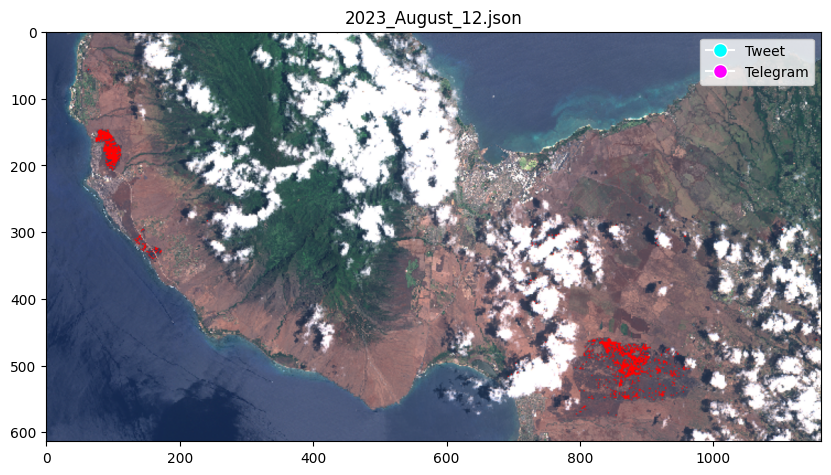

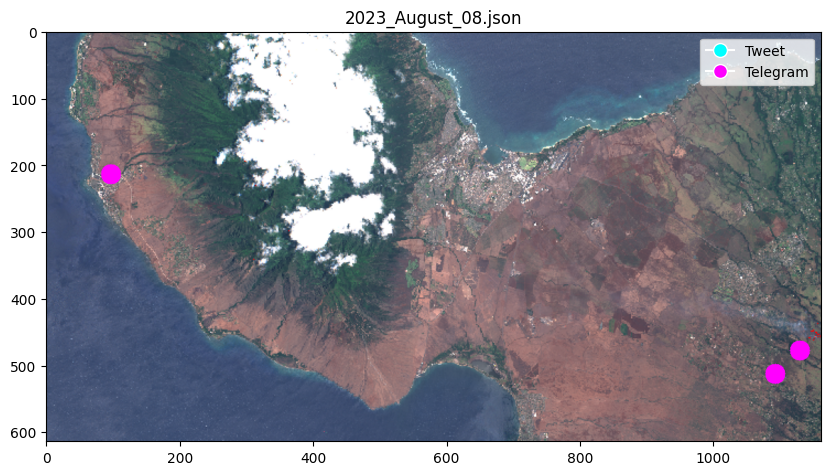

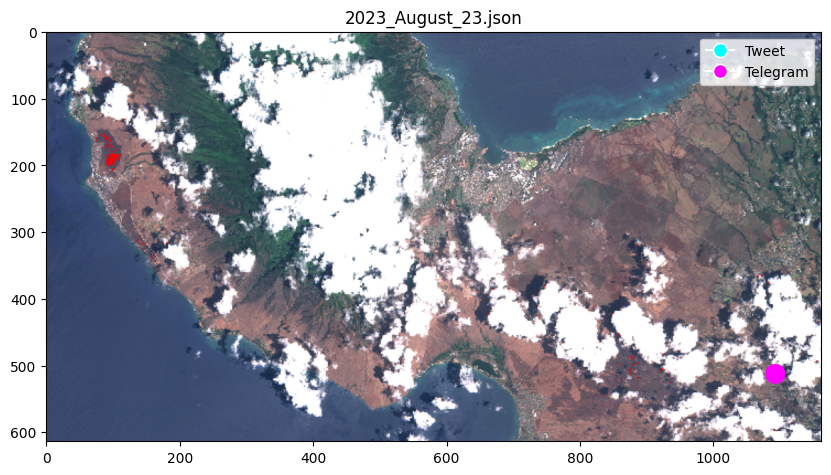

In [12]:
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt

def load_satellite_image(image_path):
    # Load the satellite image using OpenCV
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    return image



for file_path in os.listdir(os.path.join(work_dir, "by_date")):
    image = load_satellite_image(os.path.join(work_dir, "images", file_path.replace("json", "png")))
    df = pd.read_json(os.path.join(work_dir, "by_date", file_path), orient="index")
    points = []
    for index, row in df.iloc[0:].iterrows():
        status = row['Status']

        latitude = row['Lattitude']
        longitude = row['Longitude']
        title = row['Title']
        text = row['Text']
        location = row['Location']
        
        point = (latitude, longitude)   
        
        bounding_box = wsg84_coords
        # Extract bounding box coordinates
        min_lon, min_lat,max_lon, max_lat = bounding_box

        image_with_box  = image
        # Plot data points on top of the image
  
        lat, lon = point
        if min_lat <= lat <= max_lat and min_lon <= lon <= max_lon:
            # Convert latitude and longitude to pixel coordinates
            x = int((lon - min_lon) / (max_lon - min_lon) * image_with_box.shape[1])
            y = image_with_box.shape[0] - (int((lat - min_lat) / (max_lat - min_lat) * image_with_box.shape[0])) #remember y goes top down
         
            # Draw a red circle around the data point
            if "tweet" in status:
              
                image_with_box = cv2.circle(image_with_box, (x, y), 15, (0, 255, 255), -1)
            elif "telegram" in status:
            
                image_with_box = cv2.circle(image_with_box, (x, y), 15, (255, 0, 255), -1)
        else:
            print(status)
            
    # Show the image with matplotlib
    plt.figure(figsize=(10, 8))
    plt.imshow(image_with_box)
    plt.title(file_path)  # Set title with file name
    # Create a legend
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', label='Tweet', markersize=10, markerfacecolor='cyan'),
        plt.Line2D([0], [0], marker='o', color='w', label='Telegram', markersize=10, markerfacecolor='magenta')
    ]
    plt.legend(handles=legend_elements, loc='upper right')
    plt.show()